# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com dados contínuos.


-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)

### UPLOAD DE ARQUIVO LOCAL:

Para fazer o upload de bases de dados, deve-se usar o objeto ```files``` do pacote ```goggle.colab```.

Deve-se fazer o upload do arquivo "train.csv" disponível na pasta "Datasets\Titanic".

```Se você quiser um botão pra fazer upload do arquivo direto no notebook
#  from google.colab import files
#  uploaded = files.upload()
#  df = pd.read_csv(next(iter(uploaded.keys())))
```

``` Se quiser ler de uma pasta que ja está salva no seu gdrive
#  from google.colab import drive
#  drive.mount('/content/drive')
#  df = pd.read_excel('/content/drive/My Drive/arquivo.xlsx', sheet_name=0)
```



In [ ]:
%%capture
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Truque pra baixar direto pelo link
download_url = 'https://drive.google.com/uc?export=download&id='
url_drive_file = 'https://docs.google.com/spreadsheets/d/1cGZN3X8ydgwbbsaiQK5_\
yUwf3VTLH19W/edit?usp=sharing&ouid=114919786921075985733&rtpof=true&sd=true'

download_path = download_url + url_drive_file.split('/')[-2]

sonar = pd.read_excel(download_path, sheet_name=0)

sonar.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60,Classe
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rocha
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rocha
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rocha
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rocha
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rocha


### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.







In [ ]:
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)
# pd.set_option('precision', 2)

print("\nDimensões: {0}".format(sonar.shape))
print("\nCampos: {0}".format(sonar.keys())) #.columns
print("\n",sonar.describe(), sep='\n')


Dimensões: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',
       'At

In [ ]:
sonar.shape[1]-60

1

In [ ]:
X = DF_VALID.iloc[:,0:(df_valid.shape[1] - 1)] #3a maneira de fazer subset: numero de colunas -1

# Note que não vamos binarizar pois as variaveis já são numéricas
# Apenas a classe é categórica/string

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

In [ ]:
# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1) # SEED 

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [ ]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='gini')
sonar_tree = sonar_tree.fit(X_train, y_train)

In [ ]:
sonar_tree.predict(X_train)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
y_train

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
print("Acurácia (base de treinamento):", sonar_tree.score(X_train, y_train))

Acurácia (base de treinamento): 1.0


In [ ]:
# Avaliação na base de testes (previsão)

y_pred = sonar_tree.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de previsão: 0.8095238095238095


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 7  1]
 [ 3 10]]


In [ ]:
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)

       Mina (prev)  Rocha (prev)
Mina             7             1
Rocha            3            10


In [ ]:
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

              precision    recall  f1-score   support

        Mina       0.70      0.88      0.78         8
       Rocha       0.91      0.77      0.83        13

    accuracy                           0.81        21
   macro avg       0.80      0.82      0.81        21
weighted avg       0.83      0.81      0.81        21



In [ ]:
round(10/11,2) # precisao classe rocha

0.91

In [ ]:
round(10/13,2) # revocacao classe rocha

0.77

### Exibição da árvore de decisão

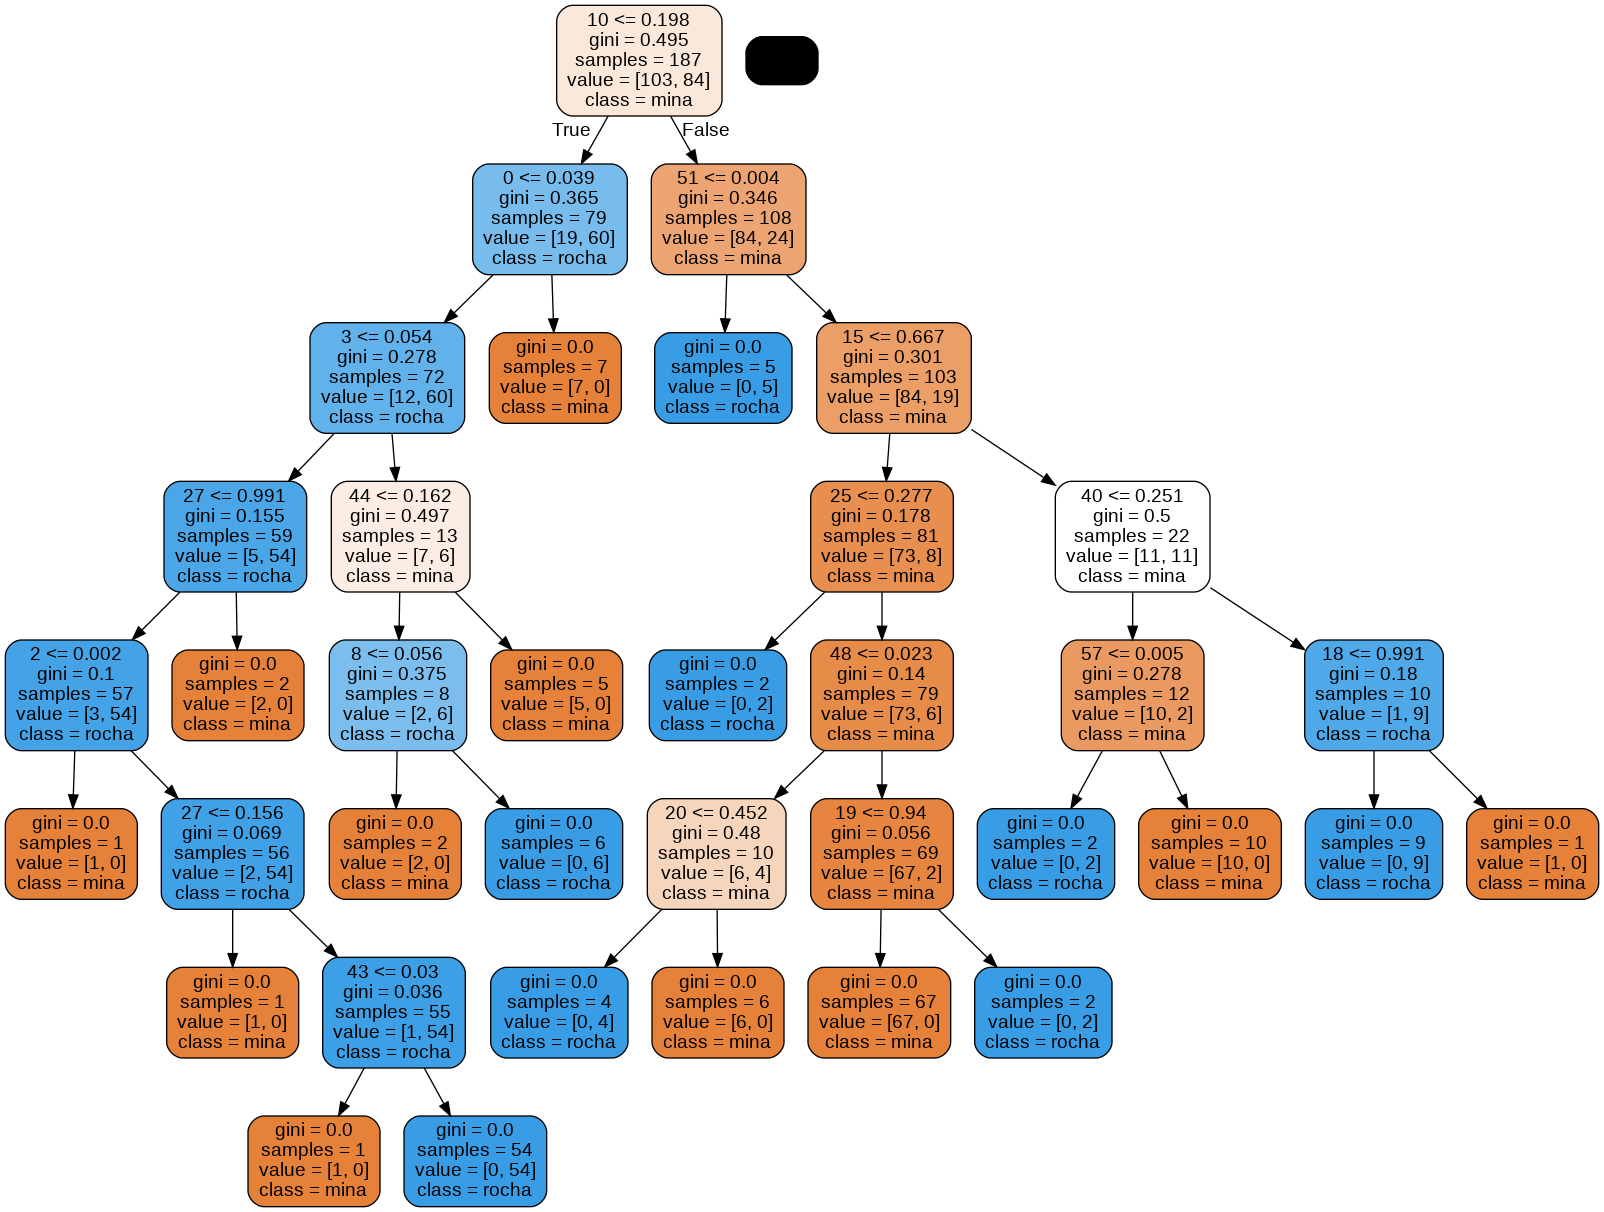

In [ ]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(sonar_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,60),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
